In [1]:
#September 19th, 2022
#Aman Chulawala

from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

In [31]:
def color2gray(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    hist_gen(gray)
    return gray


def lookup_gen():
    lookup = np.empty((3,256), dtype = 'uint8')
    #Generating Blue channel
    lookup[0,0:64] = 255
    lookup[0, 128:] = 0
    lookup[0, 64:128] = np.linspace(255,0,num = 64)
    #Generating Green Channel
    lookup[1,0:64] = np.linspace(0,255,num = 64)
    lookup[1,64:192] = 255
    lookup[1, 192:] = np.linspace(255,0, num = 64)
    #Generating Red Channel
    lookup[2, 0:128] = 0
    lookup[2, 128:192] = np.linspace(0,255, num = 64)
    lookup[2, 192:] = 255
    #Plotting lookuptable
    plt.figure(2)
    plt.plot(np.linspace(0,255, num = 256), lookup[0,:], label = "Blue", color = 'blue')
    plt.plot(np.linspace(0,255, num = 256), lookup[1,:], label = "Green", color = 'green')
    plt.plot(np.linspace(0,255, num = 256), lookup[2,:], label = "Red", color = 'red')
    plt.legend()
    plt.show()
    return lookup


def hist_gen(img):
    histSize = 256
    histRange = (0, 256)
    hist_data = cv.calcHist(img, [0], None, [histSize], histRange, accumulate=False)
    plt.figure(1)
    plt.title("Grayscale Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist_data)
    plt.xlim([0, 256])

    
def convert(img, lookup):
    b_channel = [[lookup[0,img[i,j]] for j in range(0,len(img[0]))] for i in range(0,len(img))]
    g_channel = [[lookup[1,img[i,j]] for j in range(0,len(img[0]))] for i in range(0,len(img))]
    r_channel = [[lookup[2,img[i,j]] for j in range(0,len(img[0]))] for i in range(0,len(img))]
    pseudocolored = cv.merge(np.array([r_channel, g_channel, b_channel]))
    return pseudocolored


def main(img):
    gray = color2gray(img)
    lookup = lookup_gen()
    equalized_gray = cv.equalizeHist(gray)
    #Delete
    histSize = 256
    histRange = (0, 256)
    hist_data = cv.calcHist(equalized_gray, [0], None, [histSize], histRange, accumulate=False)
    plt.figure(3)
    plt.title("Grayscale Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist_data)
    plt.xlim([0, 256])
    
    plt.figure(4)
    plt.imshow(equalized_gray, cmap = plt.cm.gray)
    plt.show()
    #Delete
    pseudocolored = convert(equalized_gray, lookup)
    return pseudocolored

Enter Filename: /Users/amanchulawala/Desktop/CMU/24-678/PS2/ps2-images/x-ray.png


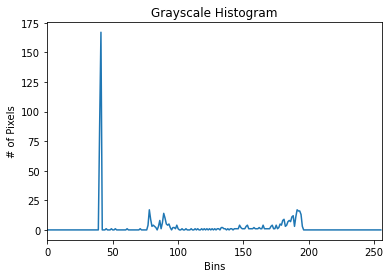

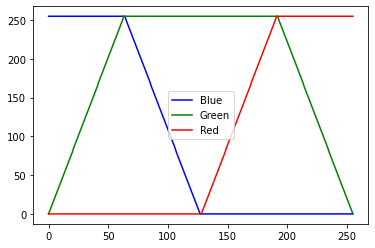

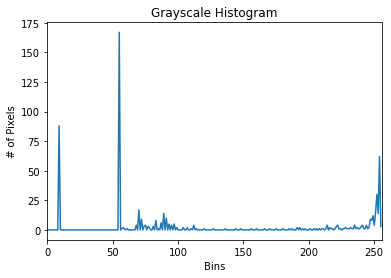

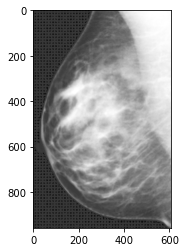

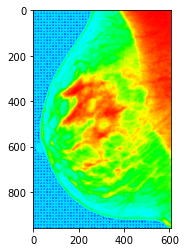

True

In [44]:
fname = input("Enter Filename: ")
img = cv.imread(fname)
final = main(img)
plt.figure(5)
plt.imshow(final)
plt.show()
name = fname.split('.')
n_name = name[0]+'-color.'+name[1]
cv.imwrite(n_name, final)

#cv.imshow('Window',img)
#cv.waitKey(5000)
#cv.destroyAllWindows()